# Symmetry analysis

This notebook is designed to analyze the degree of similarity between incoming connections to the hippocampus and outgoing connections from the hippocampus.

In [1]:
from helpers import get_feature_vectors_shared_hpc, plot_rsa, get_correlation_matrix
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [2]:
df_avg_from, df_avg_to = get_feature_vectors_shared_hpc()

In [3]:
df_avg_from_suffix = df_avg_from.add_suffix('_efferent')
df_avg_to_suffix = df_avg_to.add_suffix('_afferent')

In [4]:
# combine
df_connectivity = pd.concat([df_avg_to_suffix,df_avg_from_suffix], axis=1)

In [5]:
df_connectivity

,SI_afferent,MS_afferent,NDB_afferent,BSTam_afferent,BSTju_afferent,BSTpr_afferent,BSTif_afferent,BSTtr_afferent,BSTd_afferent,LSr.m.v_afferent,...,LHAsfa_efferent,REr_efferent,REc_efferent,PVT_efferent,PT_efferent,AV_efferent,AMd_efferent,IAM_efferent,SMT_efferent,VTA_efferent
DG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
CA3,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
CA2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CA1v,2.0,3.0,3.0,1.0,0.0,2.0,4.0,4.0,0.0,4.0,...,2.0,5.0,6.0,3.0,4.0,1.0,1.0,1.0,1.0,4.0
CA1d,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,6.0,1.0,2.0,3.0,6.0,2.0,1.0,3.0
SUBv,2.0,0.0,0.0,4.0,1.0,1.0,4.0,4.0,4.0,6.0,...,1.0,5.0,6.0,6.0,4.0,5.0,1.0,0.0,0.0,3.0
SUBd,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,6.0,0.0,1.0,3.0,2.0,2.0,0.0,2.0


In [6]:
# compute the overall cosine similarity between all the vectors
cosine_values = cosine_similarity(df_connectivity.T)
cosine_labels = df_connectivity.columns

df_cosine_similarity = pd.DataFrame(cosine_values, 
                     index=cosine_labels, 
                     columns=cosine_labels)

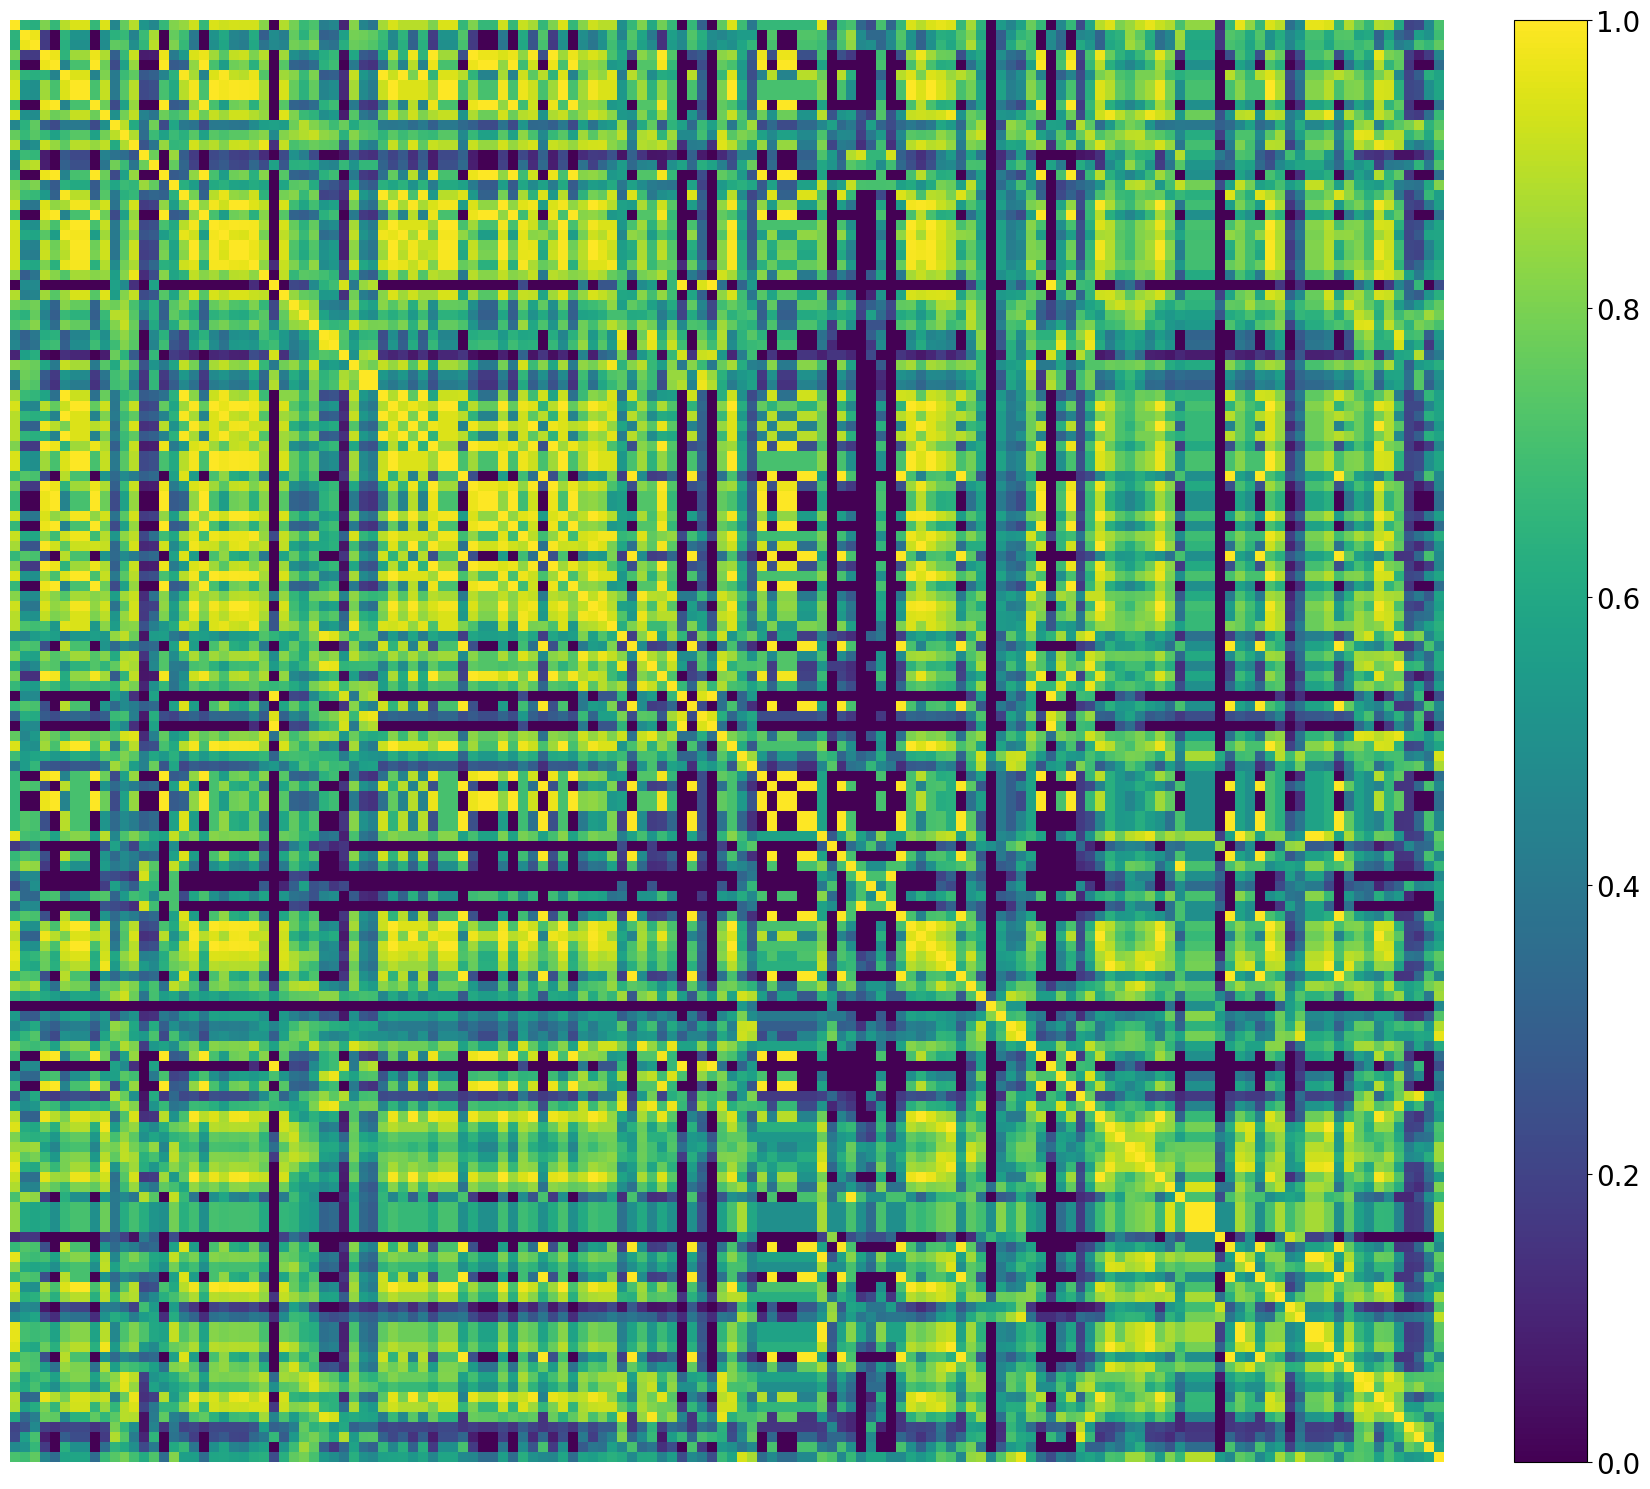

In [7]:
plot_rsa(df_cosine_similarity)

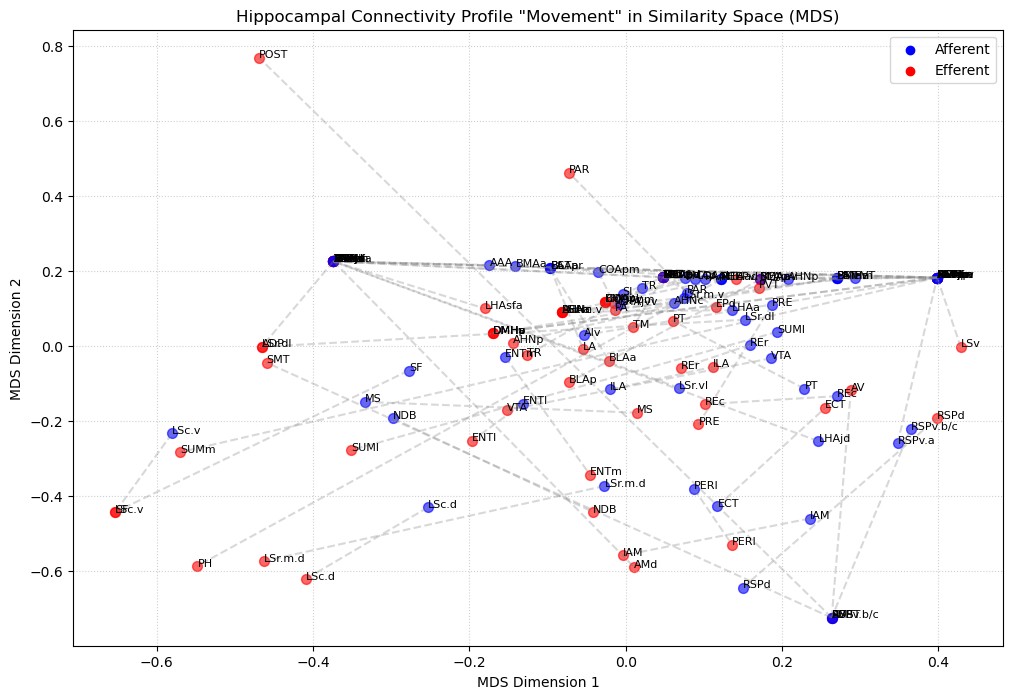

In [8]:
# next we want to plot the MDS with lines connecting the dots
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# 1. Generate Sample Data
# # Two 7x50 dataframes
# np.random.seed(42)
# cols = [f'feature_{i}' for i in range(50)]
# df1 = pd.DataFrame(np.random.rand(7, 50), columns=cols)
# # Create df2 by adding some noise to df1 so they are 'similar' but moved
# df2 = df1 + np.random.normal(0, 0.2, (7, 50))

# # 2. Rename and Combine
# df1.columns = [c + '_first' for c in df1.columns]
# df2.columns = [c + '_second' for c in df2.columns]
# combined_df = pd.concat([df1, df2], axis=1) # Shape: 7x100

# # 3. Calculate Cosine Similarity Matrix
# # We transpose (.T) because we want similarity between Columns (features), not rows.
# # Result shape: 100x100
# sim_matrix = cosine_similarity(combined_df.T)

# 4. Convert Similarity to Distance (Dissimilarity)
# MDS requires a distance matrix.
# Distance = 1 - Similarity is standard for cosine.
dist_matrix = 1 - df_cosine_similarity

# 5. Multidimensional Scaling (MDS)
# We map the 100 features into 2D space based on their pairwise distances
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(dist_matrix)

# Create a DataFrame for the 2D coordinates for easier plotting
coords_df = pd.DataFrame(coords, columns=['x', 'y'], index=df_connectivity.columns)

# 6. Plotting
plt.figure(figsize=(12, 8))

# Loop through the original feature names to draw lines
# original_features = [c.replace('_afferent', '') for c in coords_df.index if '_afferent' in c]
original_features = df_avg_from.columns

for feature in original_features:
    # Get coordinates for the 'first' and 'second' version
    p1 = coords_df.loc[f"{feature}_afferent"]
    p2 = coords_df.loc[f"{feature}_efferent"]
    
    # Plot the points
    plt.scatter(p1.x, p1.y, color='blue', alpha=0.6, s=50) # First = Blue
    plt.scatter(p2.x, p2.y, color='red', alpha=0.6, s=50)  # Second = Red
    
    # Draw a line between them to show movement
    plt.plot([p1.x, p2.x], [p1.y, p2.y], color='gray', linestyle='--', alpha=0.3)
    
    # Optional: Annotate a few points to avoid clutter
    plt.text(p1.x, p1.y, feature, fontsize=8)
    plt.text(p2.x, p2.y, feature, fontsize=8)

# Add dummy points for legend
plt.scatter([], [], color='blue', label='Afferent')
plt.scatter([], [], color='red', label='Efferent')

plt.title('Hippocampal Connectivity Profile "Movement" in Similarity Space (MDS)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.savefig('../output/MDS_aff_eff_comparison.png')
plt.show()

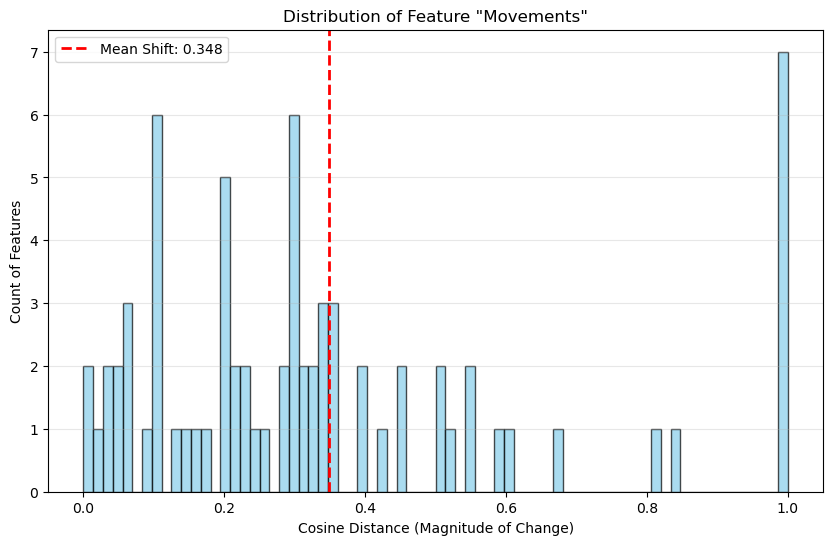

In [15]:
# plot the distribution of differences 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# # 1. Generate Sample Data (7x50) - Same as before
# np.random.seed(42)
# cols = [f'feature_{i}' for i in range(50)]
# df1 = pd.DataFrame(np.random.rand(7, 50), columns=cols)
# df2 = df1 + np.random.normal(0, 0.2, (7, 50))

# 2. Calculate the 'Movement' (Cosine Distance) for each feature
# We iterate through columns and compare df1[col] vs df2[col] directly
distances = []

# we want to categorize which regions have high similarity between afferent and efferent
low_movement = []
medium_movement = []
high_movement = []

# capture which regions have cosine distance of 0 (equivalent cosine similarity) and 
# capture which regions have cosine distance of 1 (complete cosine disimilarity)
zero_movement = []
complete_movement = []

for col in df_avg_from.columns:
    vec1 = df_avg_from[col].values.reshape(1, -1)
    vec2 = df_avg_to[col].values.reshape(1, -1)
    
    # Cosine Similarity returns a matrix, we take [0][0]
    sim = cosine_similarity(vec1, vec2)[0][0]

    dist = 1 - sim
    
    # Distance = 1 - Similarity
    distances.append(dist)

    if dist <= 0.3:
        category = "Low"
        low_movement.append(col)
    elif 0.3 < dist <= 0.7:
        category = "Medium"
        medium_movement.append(col)
    else: # dist > 0.7
        category = "High"
        high_movement.append(col)

    if dist == 0:
        zero_movement.append(col)
    elif dist == 1:
        complete_movement.append(col)

# 3. Plot the Histogram
plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(distances, bins=72, color='skyblue', edgecolor='black', alpha=0.7)

# Add Mean Line
mean_dist = np.mean(distances)
plt.axvline(mean_dist, color='red', linestyle='dashed', linewidth=2, label=f'Mean Shift: {mean_dist:.3f}')

plt.title('Distribution of Feature "Movements"')
plt.xlabel('Cosine Distance (Magnitude of Change)')
plt.ylabel('Count of Features')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.savefig('../output/distribution_of_hippocampal_feature_movements.png')
plt.show()

In [10]:
zero_movement

['VMHa']

In [13]:
complete_movement

['BSTju', 'BSTd', 'POST', 'PH', 'MPNm', 'SUMm', 'SMT']

In [52]:
high_movement

['BSTju', 'BSTd', 'POST', 'PH', 'MPNm', 'SUMm', 'LHAjd', 'AMd', 'SMT']

In [18]:
df_avg_from

Abbr.,SI,MS,NDB,BSTam,BSTju,BSTpr,BSTif,BSTtr,BSTd,LSr.m.v,...,LHAsfa,REr,REc,PVT,PT,AV,AMd,IAM,SMT,VTA
DG,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
CA3,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
CA2,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CA1v,2.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0,...,2.0,5.0,6.0,3.0,4.0,1.0,1.0,1.0,1.0,4.0
CA1d,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,6.0,1.0,2.0,3.0,6.0,2.0,1.0,3.0
SUBv,2.0,5.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,5.0,6.0,6.0,4.0,5.0,1.0,0.0,0.0,3.0
SUBd,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,6.0,0.0,1.0,3.0,2.0,2.0,0.0,2.0


In [53]:
# Create stacked histogram based on regional groupings

# define region groupings used in visualizations

# construct cortical
OLF_regions = np.array(['MOB','AOB','AOA','TTv','TTd','PIR','NLOT','TR'])
PARAH_regions = np.array(['IG','FC','ENTm','ENTl','PERI','ECT','CLA','6b'])
PFC_regions = np.array(['ILA','PL','ACAv','ACAd'])
ISU_regions = np.array(['AIv','AId','AIp'])
ORB_regions = np.array(['ORBv','ORBvl','ORBm','ORBl'])
PSM_regions = np.array(['MOp','MOs'])
SSR_regions = np.array(['SSp','SSs'])
AUD_regions = np.array(['AUDv','AUDp','AUDd','AUDpo'])
VIS_regions = np.array(['VISrl','VISal','VISlla','VISll','VISli','VISlm','VISpl','VISp','VISam','VISpm'])
EP_regions = np.array(['EPv','EPd'])
RSP_regions = np.array(['RSPv','RSPv.a','RSPv.b/c','RSPd','RSPagl'])
GVA_regions = np.array(['GU','VISC'])


cortical_regions = np.concatenate(
    (OLF_regions, PARAH_regions, PFC_regions, ISU_regions, ORB_regions, PSM_regions, SSR_regions, AUD_regions, VIS_regions, 
    EP_regions, RSP_regions, GVA_regions), axis=0
)

# hypothalamic regions
AHA_regions = np.array(['AHA', 'AHNa', 'AHNc', 'AHNp', 'AHNd'])
DHA_regions = np.array(['DMHa','DMHp','DMHv'])
mammillary_regions = np.array(['TM','MM','LM','SUMm','SUMl'])
LHA_regions = np.array([
    'LHAa','LHAjvv','LHAjvd','LHAjp','LHAjd','LHAsfa','LHAsfp','LHAs','LHAv','LHAd','LHAp'
])

hypothalamus_regions = np.concatenate(
    (AHA_regions, DHA_regions, mammillary_regions, LHA_regions), axis=0
)

# amygdala regions
CEA_regions = np.array(['CEAm','CEAl','CEAc'])
MEA_regions = np.array(['MEAav','MEAad','MEApv','MEApd'])
BST_regions = np.array([
    'BSTam','BSTfu','BSTv','BSTmg','BSTdm','BSTal','BSTov','BSTju','BSTrh','BSTpr','BSTif','BSTtr','BSTd','BSTse'
])

amygdala_non_aggregated_regions = np.array(['AAA','IA'])

amygdala_aggregated_regions = np.concatenate(
    (CEA_regions, MEA_regions, BST_regions), axis=0
)

# septal striatal regions
LS_aggregated_regions = np.array(['LSr.m.v','LSr.m.d','LSr.vl','LSr.dl','LSc.v','LSc.d','LSv'])

LS_non_aggregated_regions = np.array(['MS','NDB','ACB'])

hippocampus_regions = np.array(['DG','CA3','CA2','CA1v','CA1d','SUBv','SUBd','PAR', 'PRE', 'POST'])

septostri_regions = np.concatenate(
    (LS_aggregated_regions, LS_non_aggregated_regions), axis=0
)

In [54]:
regions = list(df_avg_to.columns)

# Assign each region to a group
region_groups = {}
for region in regions:
    if region in cortical_regions:
        region_groups[region] = "Cortical"
    elif region in hypothalamus_regions:
        region_groups[region] = "Hypothalamus"
    elif region in amygdala_aggregated_regions:
        region_groups[region] = "Amygdala"
    elif region in septostri_regions:
        region_groups[region] = "Septal Striatum"
    else:
        region_groups[region] = "Other"

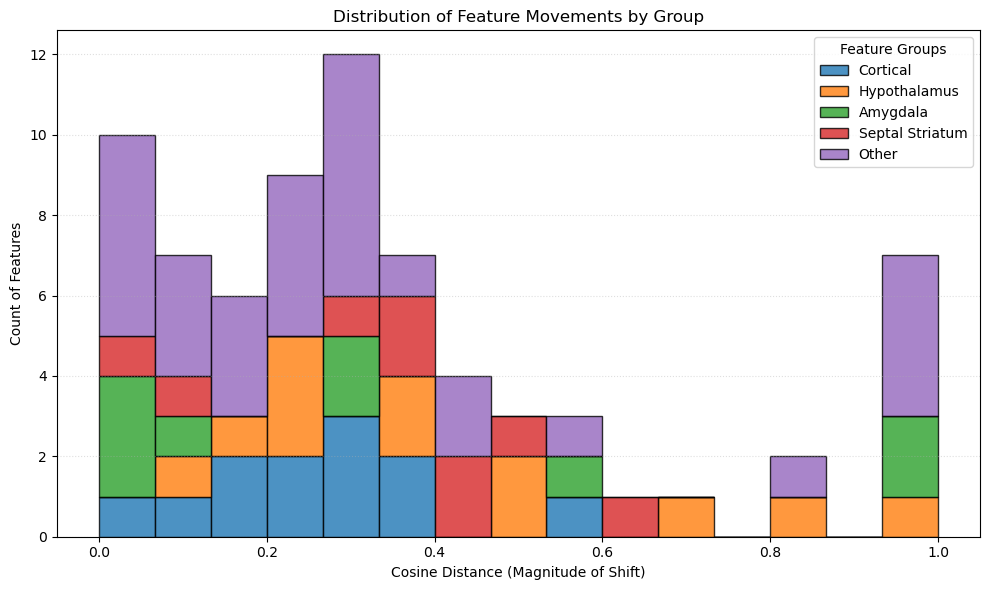

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# 3. Calculate Distances and Organize by Group
# We create a dictionary to hold list of distances for each group
# Format: {'Group A': [0.1, 0.05...], 'Group B': [0.2, ...]}
group_names = ['Cortical', 'Hypothalamus', 'Amygdala', 'Septal Striatum', 'Other']
grouped_distances = {g: [] for g in group_names}

for col in df_avg_to.columns:
    # Calculate Distance
    vec1 = df_avg_to[col].values.reshape(1, -1)
    vec2 = df_avg_from[col].values.reshape(1, -1)
    sim = cosine_similarity(vec1, vec2)[0][0]
    dist = 1 - sim
    
    # Add to the correct group list
    group_assignment = region_groups[col]
    grouped_distances[group_assignment].append(dist)

# 4. Prepare Data for Plotting
# matplotlib.hist expects a list of arrays (e.g. [data_A, data_B, data_C]) for stacking
plot_data = [grouped_distances[g] for g in group_names]

# 5. Plot Stacked Histogram
plt.figure(figsize=(10, 6))

# stacked=True is the key parameter here
plt.hist(plot_data, 
         bins=15, 
         stacked=True, 
         label=group_names, 
         edgecolor='black', 
         alpha=0.8)

plt.title('Distribution of Feature Movements by Group')
plt.xlabel('Cosine Distance (Magnitude of Shift)')
plt.ylabel('Count of Features')
plt.legend(title='Feature Groups')
plt.grid(axis='y', linestyle=':', alpha=0.4)

plt.tight_layout()
plt.savefig('../output/feature_movements_stacked_histogram.png')
plt.show()

# Compare cluster assignments

Next we want to determine how regions move or stay the same in terms of the clusters they're assigned to.

In [66]:
import bct

df_cosine_afferent = get_correlation_matrix(df_avg_to, "cosine")
df_cosine_efferent = get_correlation_matrix(df_avg_from, "cosine")

# Create data and labels for both afferent and efferent
efferent_connection_values = df_cosine_efferent.values
efferent_labels = df_cosine_efferent.index

afferent_connection_values = df_cosine_afferent.values
afferent_labels = df_cosine_afferent.index

# efferent
gamma_resolution = 1.0
community_assignments_e, modularity_score_e = bct.community_louvain(efferent_connection_values, 
                                                                    gamma=gamma_resolution, 
                                                                    seed=42)

# afferent
community_assignments_a, modularity_score_a = bct.community_louvain(afferent_connection_values, 
                                                                    gamma=gamma_resolution, 
                                                                    seed=42)

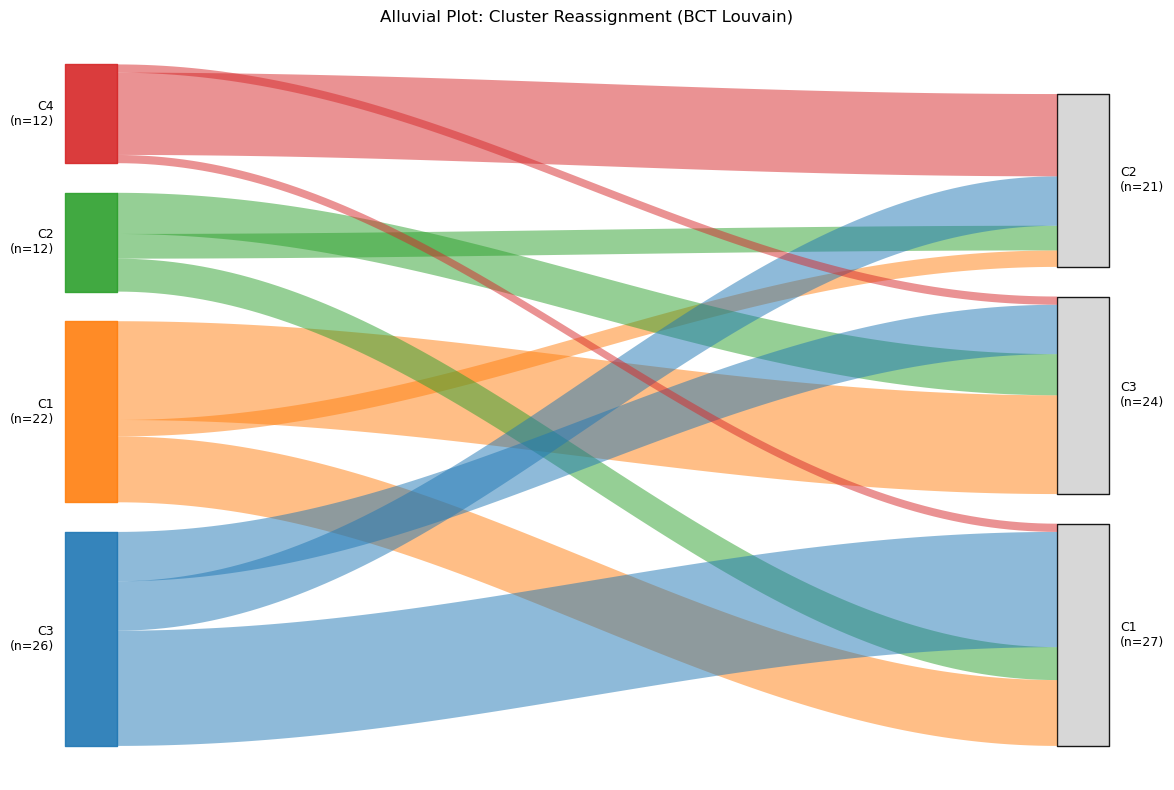

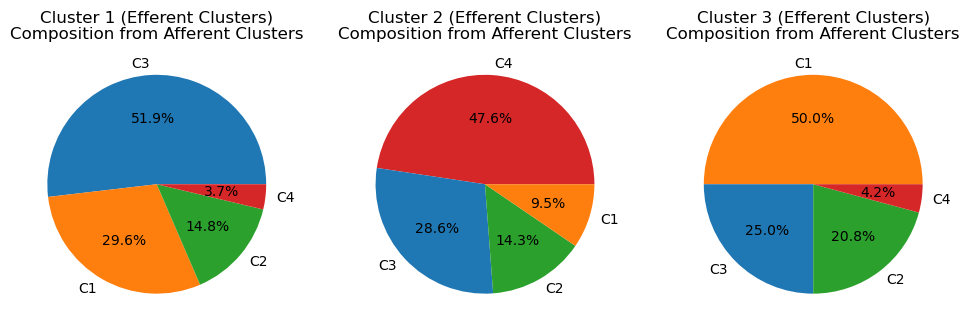

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import bct  # Brain Connectivity Toolbox (bctpy)

np.random.seed(42) # Ensures reproducibility for the example

def get_bct_clusters(df):
    # 1. Create Adjacency Matrix (50x50)
    # We use absolute correlation as the weight. 
    # Louvain works best with positive weights.
    W = df.values
    
    # 2. Run BCT Louvain
    # ci is the community assignment vector
    # q is the modularity score
    # gamma=1 is the standard resolution parameter
    ci, q = bct.community_louvain(W, gamma=1)
    
    # Map column names to cluster IDs
    # ci is an array of integers matching the column order
    return {col: cluster_id for col, cluster_id in zip(df.columns, ci)}

# Get cluster assignments using BCT
c1_map = get_bct_clusters(df_cosine_afferent)
c2_map = get_bct_clusters(df_cosine_efferent)

# Create the comparison dataframe
sorted_cols = sorted(df_cosine_afferent.columns)
cluster_df = pd.DataFrame({
    'Col': sorted_cols,
    'Cluster1': [c2_map[c] for c in sorted_cols],
    'Cluster2': [c1_map[c] for c in sorted_cols]
})

# ==========================================
# 2. Alluvial Plot (Matplotlib)
# ==========================================
# Prepare flow counts
flow_counts = cluster_df.groupby(['Cluster1', 'Cluster2']).size().reset_index(name='Count')

# Helper: Sort clusters by size for cleaner layout
def get_sorted_order(series):
    return series.value_counts().index.tolist()

c1_order = get_sorted_order(cluster_df['Cluster1'])
c2_order = get_sorted_order(cluster_df['Cluster2'])

# Helper: Calculate vertical ranges for bars
def get_y_ranges(order, counts, total_items, gap=0.05):
    y_start = 0
    ranges = {}
    for cid in order:
        count = counts[cid]
        ranges[cid] = (y_start, y_start + count)
        y_start += count + (total_items * gap)
    return ranges

total_items = len(cluster_df)
c1_counts = cluster_df['Cluster1'].value_counts()
c2_counts = cluster_df['Cluster2'].value_counts()

y_ranges_1 = get_y_ranges(c1_order, c1_counts, total_items)
y_ranges_2 = get_y_ranges(c2_order, c2_counts, total_items)

# Define Colors based on Cluster 1 (Left side)
colors = list(mcolors.TABLEAU_COLORS.values())
c1_colors = {cid: colors[i % len(colors)] for i, cid in enumerate(c1_order)}

plt.figure(figsize=(12, 8))

# Draw Left Bars (Dataset 1)
for cid, (y0, y1) in y_ranges_1.items():
    plt.fill_betweenx([y0, y1], 0, 0.5, color=c1_colors[cid], alpha=0.9)
    plt.text(-0.1, (y0+y1)/2, f"C{cid}\n(n={c1_counts[cid]})", ha='right', va='center', fontsize=9)

# Draw Right Bars (Dataset 2)
for cid, (y0, y1) in y_ranges_2.items():
    plt.fill_betweenx([y0, y1], 9.5, 10, color='lightgray', alpha=0.9, edgecolor='black')
    plt.text(10.1, (y0+y1)/2, f"C{cid}\n(n={c2_counts[cid]})", ha='left', va='center', fontsize=9)

# Draw Flows (Sigmoid Curves)
y_offsets_1 = {cid: y_ranges_1[cid][0] for cid in c1_order}
y_offsets_2 = {cid: y_ranges_2[cid][0] for cid in c2_order}
x = np.linspace(0.5, 9.5, 100)

for _, row in flow_counts.iterrows():
    c1 = row['Cluster1']
    c2 = row['Cluster2']
    count = row['Count']
    
    # Calculate start/end y-coordinates
    y1_start = y_offsets_1[c1]
    y1_end = y1_start + count
    y_offsets_1[c1] += count
    
    y2_start = y_offsets_2[c2]
    y2_end = y2_start + count
    y_offsets_2[c2] += count
    
    # Smooth transition (Sigmoid)
    t = (x - 0.5) / 9.0
    s = 0.5 - 0.5 * np.cos(np.pi * t)
    y_bot = y1_start + (y2_start - y1_start) * s
    y_top = y1_end + (y2_end - y1_end) * s
    
    plt.fill_between(x, y_bot, y_top, color=c1_colors[c1], alpha=0.5, edgecolor=None)

plt.title("Alluvial Plot: Cluster Reassignment (BCT Louvain)")
plt.axis('off')
plt.tight_layout()
plt.savefig('../output/alluvial_plot_afferent_efferent.png')
plt.show()

# ==========================================
# 3. Pie Charts
# ==========================================
unique_c2 = sorted(cluster_df['Cluster2'].unique())
n_c2 = len(unique_c2)
cols = 3
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
if n_c2 > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, c2 in enumerate(unique_c2):
    ax = axes[i]
    subset = cluster_df[cluster_df['Cluster2'] == c2]
    comp = subset['Cluster1'].value_counts()
    
    # Match colors to the alluvial plot
    pie_colors = [c1_colors.get(idx, 'grey') for idx in comp.index]
    
    ax.pie(comp, labels=[f"C{idx}" for idx in comp.index], colors=pie_colors, autopct='%1.1f%%')
    ax.set_title(f"Cluster {c2} (Efferent Clusters)\nComposition from Afferent Clusters")

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# plt.tight_layout()
plt.savefig('../output/pie_chart_eff_aff_clustering.png')
plt.show()

In [34]:
df_scores.merge(
    df_mapping_unique, 
    left_on='brain_region', 
    right_on='region_name', 
    how='left'
)

,brain_region,symmetry_score,region_name,major_division,Unnamed: 2,Unnamed: 3
0,SI,0.057191,SI,CNU,NaN,NaN
1,MS,0.447560,MS,CNU,NaN,NaN
2,NDB,0.338562,NDB,CNU,NaN,NaN
3,BSTam,0.029857,BSTam,CNU,NaN,NaN
4,BSTju,1.000000,BSTju,CNU,NaN,NaN
...,...,...,...,...,...,...
67,AV,0.547733,AV,TH,NaN,NaN
68,AMd,0.845697,AMd,TH,NaN,NaN
69,IAM,0.292893,IAM,TH,NaN,NaN
70,SMT,1.000000,SMT,TH,NaN,NaN


In [36]:
# lets generate the output excel file which has the relevant columns as output:
# - brain region
# - major division
# - symmetry score

import pandas as pd

# 1. Load your mapping file (700 rows)
# Assuming columns are 'region_name' and 'major_division'
df_mapping = pd.read_csv('../data/label_major_division_mapping.csv')

df_mapping_unique = df_mapping.drop_duplicates(subset=['region_name'])

# 2. Extract the 72 brain regions from your 7x72 dataframe
regions = df_avg_from.columns.tolist()

# 3. Create a temporary dataframe with your 72 regions and their scores
# This ensures the 'symmetry_score' stays locked to the correct column name
df_scores = pd.DataFrame({
    'brain_region': regions,
    'symmetry_score': distances # Your 72-element array
})

# 4. Merge with the 700-row mapping file
# 'how=left' ensures we keep only the 72 regions in your data
final_df = df_scores.merge(
    df_mapping_unique, 
    left_on='brain_region', 
    right_on='region_name', 
    how='left'
)

# 5. Final cleanup: select and reorder columns
final_df = final_df[['brain_region', 'major_division', 'symmetry_score']]

# To sort from lowest to highest symmetry score
final_df_sorted = final_df.sort_values(by='symmetry_score').reset_index(drop=True)
# final_df = final_df.reset_index(drop=True)
# If you want to modify the existing dataframe without creating a new variable:
# final_df.sort_values(by='symmetry_score', ascending=False, inplace=True)

print(final_df_sorted.head())

  brain_region major_division  symmetry_score
0         VMHa             HY    0.000000e+00
1        MEApd            CNU    2.220446e-16
2        MEAad            CNU    1.941932e-02
3        BSTam            CNU    2.985750e-02
4          EPv            CTX    2.985750e-02


In [37]:
final_df_sorted.to_csv('../output/brain_regions_symmetry_score.csv')